In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
dataset=pd.read_csv("D:\\pragnya\\AIML\\DATASET\\HR_comma_sep.csv")
#dataset.info()
#dataset.describe()
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Matplotlib is building the font cache; this may take a moment.


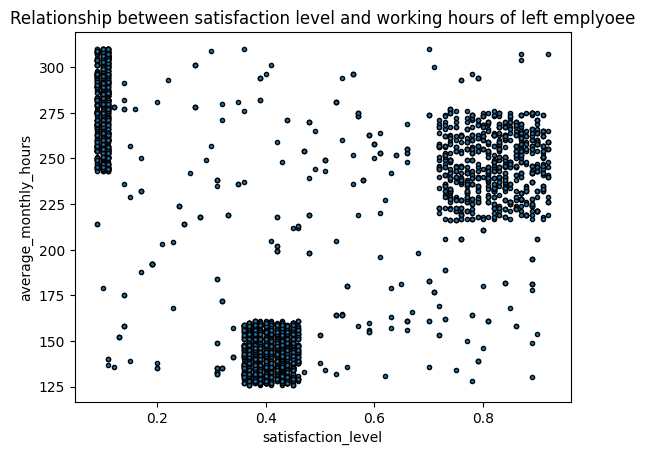

In [3]:
#plot relationship between satisfaction level and working hours of left emplyoee
import matplotlib.pyplot as plt
left_emplyoee=dataset[dataset['left']==1]
plt.scatter(left_emplyoee['satisfaction_level'],left_emplyoee['average_montly_hours'],marker=".",edgecolors="black")
plt.xlabel('satisfaction_level')
plt.ylabel('average_monthly_hours')
plt.title('Relationship between satisfaction level and working hours of left emplyoee')
plt.show()

In [5]:
#ENCODING Department and Salary column
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
dataset['Department']=label_encoder.fit_transform(dataset['Department'])
dataset['salary']=label_encoder.fit_transform(dataset['salary'])

#split Dataset
from sklearn.model_selection import train_test_split
x=dataset.drop(columns=['left'])
y=dataset['left']
x_train,x_test,y_train,y_test=train_test_split(x,y)

#print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#creating model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

#saving the model
# import pickle
# with open('/content/drive/MyDrive/pratice/LogisticRegressionModel.pkl','wb') as f:
#   pickle.dump(model,f)

0.7659347497555338
0.7728


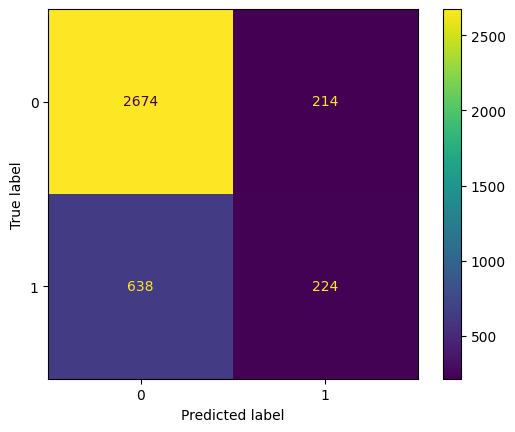

In [6]:
#calculating confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
y_pred=model.predict(x_test)
y_true=np.array(y_test)
cm=confusion_matrix(y_true,y_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

Decission Tree


In [10]:

import pickle
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
print(model1.score(x_train,y_train))
print(model1.score(x_test,y_test))

# with open('/content/drive/MyDrive/pratice/DecisionTreeModel.pkl','wb') as f:
#   pickle.dump(model1,f)

1.0
0.9802666666666666


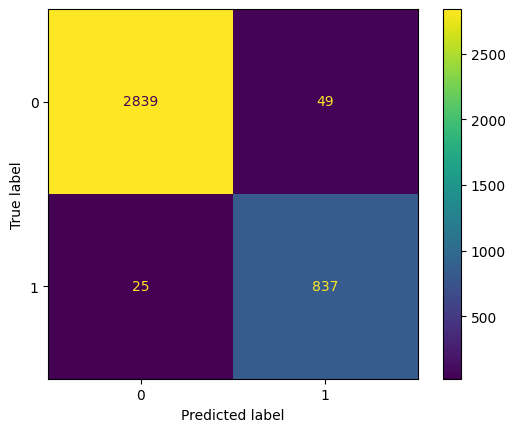

In [11]:
#calculating confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
y_pred=model1.predict(x_test)
y_true=np.array(y_test)
cm=confusion_matrix(y_true,y_pred,labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()
plt.show()

Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

with open('D:\\pragnya\\AIML\\Project\\CapstoneProject\\RandomForestModel.pkl','wb') as f:
  pickle.dump(model2,f)

0.9999111032091742
0.9928


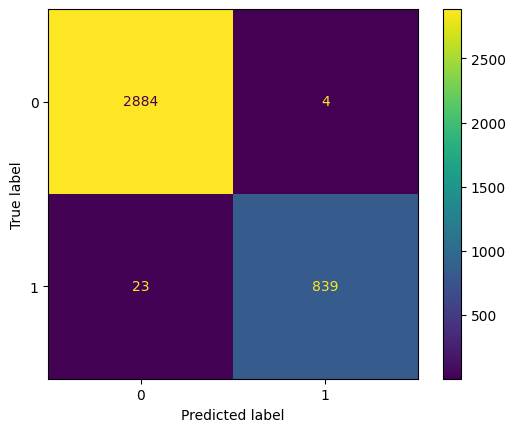

In [17]:
#calculating confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
y_pred=model2.predict(x_test)
y_true=np.array(y_test)
cm=confusion_matrix(y_true,y_pred,labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model2.classes_)
disp.plot()
plt.show()

In [19]:
#loading model
import warnings
with open('D:\\pragnya\\AIML\\Project\\CapstoneProject\\RandomForestModel.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
user_input=[[0.38, 0.53,2,157,3,0,0,0,0]]
warnings.filterwarnings("ignore", message="X does not have valid feature names")

predicted_class=loaded_model.predict(user_input)
print()
if predicted_class==[1]:
  print("Emplyoee will leave")
else:
  print("Employee will not leave")


Emplyoee will leave
